In [45]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [46]:
df = pd.read_csv('matrix.txt', header = None)
col = ['storm_id', 'month', 'maxh', 'long', 'peakt', 'longabou', 'meanabou', 'medabou', 'stdabou']
df.columns = col
# содержание файл
# storm_id - id шторма
# month - месяц
# maxh - максимальная высота волны
# long - продолжительность шторма
# peakt - время наступления пика
# longabou - продолжительность стадии затухания
# meanabou - средняя высота волны стадии затухания
# meadabou - медианная высота волны стадии затухания
# стандартное отклонение стадии затухания

In [47]:
df.head()

,storm_id,month,maxh,long,peakt,longabou,meanabou,medabou,stdabou
0,1,1,2.5460,21,0,21,1.7784,1.7440,0.49789
1,2,1,2.4001,30,12,18,1.6663,1.5964,0.52874
2,3,1,1.8282,30,9,21,1.3331,1.2617,0.24583
3,4,1,1.9557,33,9,24,1.4245,1.2883,0.27216
4,5,2,2.1852,33,21,12,1.3783,1.3091,0.35488


In [48]:
# вычисляем дополнительные колонки
# коэффициент размыва R
df['relmean'] = df.maxh/df.meanabou # метрика R относительно среднего
df['relmed'] = df.maxh/df.medabou # метрика R относительно медианы

#### определяем разницу в распределении значений R рассчитанных относительно среднего и относительно медианы

[Text(0.5, 0, 'R_med')]

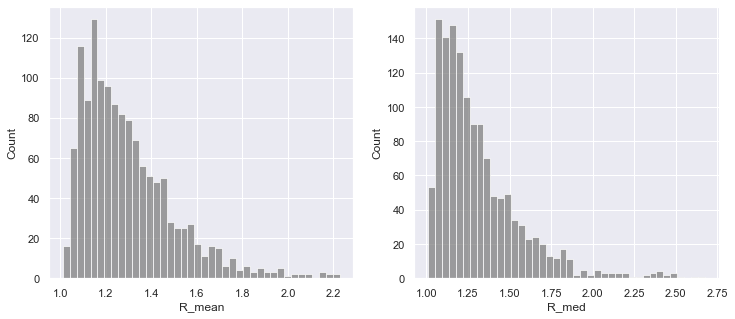

In [49]:
sns.set()
#define dimensions of subplots (rows, columns)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,5))
#create chart in each subplot
ak1 = sns.histplot(df['relmean'], kde = False,  bins = 40, color='grey', ax=axes[0])
ak2 = sns.histplot(df['relmed'], kde = False, bins = 40, color='grey', ax=axes[1])
ak1.set(xlabel="R_mean")
ak2.set(xlabel="R_med")

In [50]:
fig.savefig('R_diff.jpg', dpi=300)

#### Значение рассчитанные относительно медианы охватывают более широкий диапазон значений, что позволит лучше выявлять различия для разных групп значений данного коэффициента

[Text(0.5, 0, 'месяц'), Text(0, 0.5, 'R')]

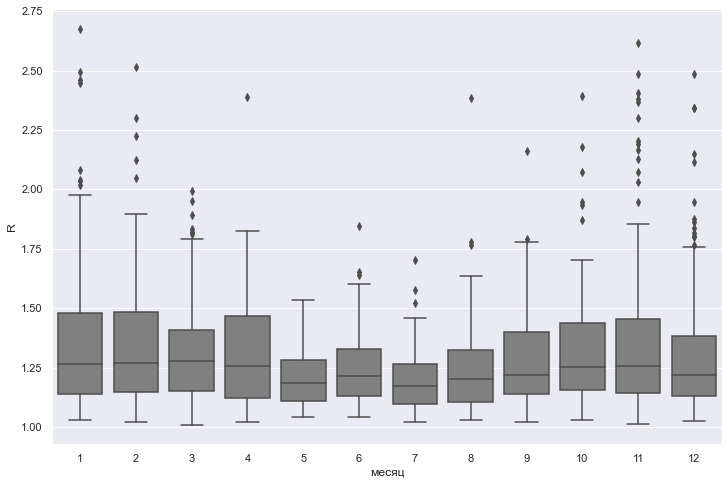

In [51]:
fig = plt.figure(figsize=(12, 8))#изменение размера рисунка
sns.boxplot(data=df, 
            x='month', 
            y='relmed',
            color='grey'
            ).set(xlabel='месяц', 
            ylabel='R'
            )

In [52]:
fig.savefig('index_storm.jpg', dpi=300)

In [65]:
# добавляем индикатор типа сезона в зависимости от месяца
# create a list of our conditions
conditions = [
    (df['month'] >= 1) & (df['month'] <= 4),
    (df['month'] > 4) & (df['month'] < 9),
    (df['month'] >= 9) & (df['month'] <= 12)
    ]
# create a list of the values we want to assign for each condition
values = ['штормовой', 'умеренный', 'штормовой']
# create a new column and use np.select to assign values to it using our lists as arguments
df['season_char'] = np.select(conditions, values)

In [66]:
df.head()

,storm_id,month,maxh,long,peakt,longabou,meanabou,medabou,stdabou,relmean,relmed,season_char
0,1,1,2.5460,21,0,21,1.7784,1.7440,0.49789,1.431624,1.459862,штормовой
1,2,1,2.4001,30,12,18,1.6663,1.5964,0.52874,1.440377,1.503445,штормовой
2,3,1,1.8282,30,9,21,1.3331,1.2617,0.24583,1.371390,1.448997,штормовой
3,4,1,1.9557,33,9,24,1.4245,1.2883,0.27216,1.372903,1.518047,штормовой
4,5,2,2.1852,33,21,12,1.3783,1.3091,0.35488,1.585431,1.669238,штормовой


[Text(0.5, 0, 'R'), Text(0, 0.5, 'сезон')]

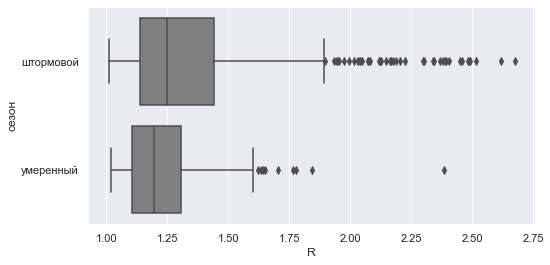

In [70]:
fig = plt.figure(figsize=(8, 4))#изменение размера рисунка
sns.boxplot(data=df, 
            x="relmed", 
            y="season_char", 
            color='grey'
            ).set(xlabel='R', 
            ylabel='сезон'
            )

In [71]:
fig.savefig('index_season.jpg', dpi=300)